# Python Part 4 - Pandas

<img src="https://miro.medium.com/max/748/1*wP8ubuQEIrtxtfd-DTOTig.jpeg" width="400px"/>
<hr>

**Topics**
<li>Joining, appending, and combining Data frame</li>
<li>Grouping</li>
<li>Pivot tables</li>
<li>Anonymous Functions</li>
<li>Example of a Class</li>
<li>Pandas Time-date type</li>
<hr>
<strong style="color:red">Book</strong>: Python for Data Analysis By William McKinney (Google it, to get free pdf)

In [13]:
## Import relevant Modules and submodules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

from sklearn.datasets import load_boston
from sklearn.datasets import load_iris

%matplotlib inline

np.random.seed(100)

In [14]:
#Default on Credit Cards Data from UCI
ccd = pd.read_excel('./default of credit card clients.xls', skiprows=1)
ccd.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [15]:
#Iris Flower data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
iris = pd.read_csv(url, names= col_names)
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [5]:
# Find all unique values
iris['class'].unique()
# iris.class.unique() " Whis class not a good column name?

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
set(iris["class"])

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

#### Handling Categorical Features

In [16]:
iris2 = pd.get_dummies(iris,columns=['class'])

In [11]:
iris2.head()

,sepal_length,sepal_width,petal_length,petal_width,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# How to replace some strings
iris.replace({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}, inplace=True )

In [12]:
iris.tail(2)

,sepal_length,sepal_width,petal_length,petal_width,class
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [16]:
# California Housing data from SKLearn
cal = datasets.fetch_california_housing()

In [17]:
cal_housing  = pd.DataFrame(data=cal.data, columns=cal.feature_names)
cal_housing.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22


### Joining Dataframes
***
Similar to the idea of joining SQL tables.
<img src="https://www.google.com/url?sa=i&url=https%3A%2F%2Fjavarevisited.blogspot.com%2F2012%2F11%2Fhow-to-join-three-tables-in-sql-query-mysql-sqlserver.html&psig=AOvVaw11ozSB4UKn4MRpK1vRRrDZ&ust=1649002373447000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCMi88tvi9fYCFQAAAAAdAAAAABAD" width="300px"/>
<table><tr><td></td><td></td></tr></table>
For details: https://pandas.pydata.org/pandas-docs/stable/merging.html

In [17]:
# Create a  test DF
data1 = [[2 ,3, 5, "Earth"],
         [1,8, 3, "Mars"],
         [2, 4, 6, "Venus"], 
         [3, 8, 2, "Uranus"], 
         [1, 3, 4, "Saturn"]]
df1 = pd.DataFrame(data=data1, columns=["A", "B", "C", "Planet"])
df1

,A,B,C,Planet
0,2,3,5,Earth
1,1,8,3,Mars
2,2,4,6,Venus
3,3,8,2,Uranus
4,1,3,4,Saturn


In [19]:
# Create another test DF
data2 = [[2 ,4, 1, "Mercury"],
         [2,3, 3, "Mars"],
         [5, 1, 2, "Neptune"], 
         [5, 3, 6, "Uranus"], 
         [6, 3, 8, "Saturn"]]
df2 = pd.DataFrame(data=data2, columns=["D", "E", "F", "Planet"])
df2

,D,E,F,Planet
0,2,4,1,Mercury
1,2,3,3,Mars
2,5,1,2,Neptune
3,5,3,6,Uranus
4,6,3,8,Saturn


#### MERGE

In [20]:
# Left-join 
left_join = pd.merge(left=df1, right=df2, how='left', left_on='Planet', right_on='Planet')
left_join

,A,B,C,Planet,D,E,F
0,2,3,5,Earth,NaN,NaN,NaN
1,1,8,3,Mars,2.0,3.0,3.0
2,2,4,6,Venus,NaN,NaN,NaN
3,3,8,2,Uranus,5.0,3.0,6.0
4,1,3,4,Saturn,6.0,3.0,8.0


In [16]:
# Right-join
right_join = pd.merge(left=df1, right=df2, how='right',
                      left_on='Planet', right_on='Planet', sort=True)
right_join

,A,B,C,Planet,D,E,F
0,1.0,8.0,3.0,Mars,2,3,3
1,NaN,NaN,NaN,Mercury,2,4,1
2,NaN,NaN,NaN,Neptune,5,1,2
3,1.0,3.0,4.0,Saturn,6,3,8
4,3.0,8.0,2.0,Uranus,5,3,6


In [17]:
# Inner-join
inner_join = pd.merge(left=df1, right=df2, how='inner', left_on='Planet', right_on='Planet')
inner_join

,A,B,C,Planet,D,E,F
0,1,8,3,Mars,2,3,3
1,3,8,2,Uranus,5,3,6
2,1,3,4,Saturn,6,3,8


In [18]:
#Outer-join
outer_join = pd.merge(left=df1, right=df2, how='outer', left_on='Planet', right_on='Planet')
outer_join

,A,B,C,Planet,D,E,F
0,2.0,3.0,5.0,Earth,NaN,NaN,NaN
1,1.0,8.0,3.0,Mars,2.0,3.0,3.0
2,2.0,4.0,6.0,Venus,NaN,NaN,NaN
3,3.0,8.0,2.0,Uranus,5.0,3.0,6.0
4,1.0,3.0,4.0,Saturn,6.0,3.0,8.0
5,NaN,NaN,NaN,Mercury,2.0,4.0,1.0
6,NaN,NaN,NaN,Neptune,5.0,1.0,2.0


#### JOIN based on indices

In [19]:
# joining two DFs  on their indexes
df1.join(df2, how='inner',   lsuffix='_l', rsuffix='_r')

,A,B,C,Planet_l,D,E,F,Planet_r
0,2,3,5,Earth,2,4,1,Mercury
1,1,8,3,Mars,2,3,3,Mars
2,2,4,6,Venus,5,1,2,Neptune
3,3,8,2,Uranus,5,3,6,Uranus
4,1,3,4,Saturn,6,3,8,Saturn


### Concatenate and append

In [21]:
# Concatenating two DFs side-by-side, row-indices should conform
DF_1 = df1[["Planet", "A"]]
DF_2 = df2[["D", "E"]]
pd.concat([DF_1, DF_2], axis=1)
#axis=0 is for vertical axis

,Planet,A,D,E
0,Earth,2,2,4
1,Mars,1,2,3
2,Venus,2,5,1
3,Uranus,3,5,3
4,Saturn,1,6,3


In [12]:
# Concatenating two DFs one below the other (Columns names must conform)
df3 = pd.DataFrame(data={"A":[6, 7], "Planet":["Earth", "Mars"]})
df4 = pd.concat([df1[["A", "Planet"]], df3], axis=0)#axis=0 for vertical

In [14]:
df4
df4.reset_index()

,index,A,Planet
0,0,2,Earth
1,1,1,Mars
2,2,2,Venus
3,3,3,Uranus
4,4,1,Saturn
5,0,6,Earth
6,1,7,Mars


In [15]:
#Appending rows below a DF
df3.append(df1[["A", "Planet"]])

,A,Planet
0,6,Earth
1,7,Mars
0,2,Earth
1,1,Mars
2,2,Venus
3,3,Uranus
4,1,Saturn


### Grouping
<hr>
Split, Apply and Combine philosophy.
<img src="https://s3.amazonaws.com/files.dezyre.com/images/Tutorials/Split+Apply+Combine+Strategy.png" width="300px">

In [21]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [25]:
dfgb = iris.groupby("class") # Returns a DataFrameGrouBy object

In [26]:
type(dfgb)

pandas.core.groupby.generic.DataFrameGroupBy

In [28]:
for name, group in dfgb:
    print ("class: {}".format(name))
    print (group)

class: Iris-setosa
    sepal_length  sepal_width  petal_length  petal_width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
1

Iris-setosa             AxesSubplot(0.1,0.559091;0.363636x0.340909)
Iris-versicolor    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
Iris-virginica              AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

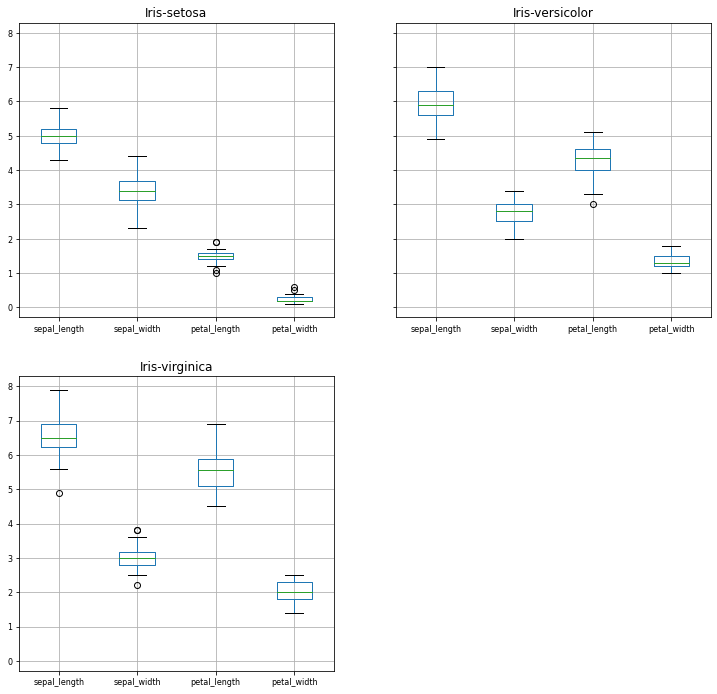

In [29]:
dfgb.boxplot(figsize=(12,12), fontsize=8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a128aa4d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a11db9090>]], dtype=object)

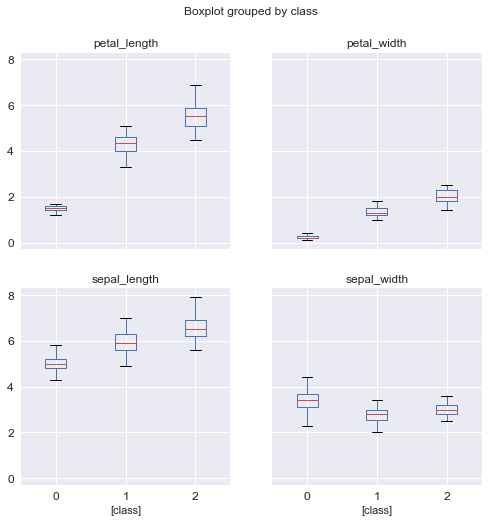

In [28]:
iris.boxplot(by="class", figsize=(8,8), fontsize=12)

In [30]:
#iris.groupby("class").mean()
dfgb.mean()

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [30]:
iris.groupby("class").agg(np.mean)

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
0,5.006,3.418,1.464,0.244
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [31]:
iris.groupby("class").describe()

petal_length                                              petal_width  \
             count   mean       std  min  25%   50%    75%  max       count   
class                                                                         
0             50.0  1.464  0.173511  1.0  1.4  1.50  1.575  1.9        50.0   
1             50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1        50.0   
2             50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9        50.0   

             ...  sepal_length      sepal_width                               \
        mean ...           75%  max       count   mean       std  min    25%   
class        ...                                                               
0      0.244 ...           5.2  5.8        50.0  3.418  0.381024  2.3  3.125   
1      1.326 ...           6.3  7.0        50.0  2.770  0.313798  2.0  2.525   
2      2.026 ...           6.9  7.9        50.0  2.974  0.322497  2.2  2.800   

                        
       50%    75%  max  
class                   
0      3.4  3.675  4.4  
1      2.8  3.000  3.4  
2      3.0  3.175  3.8  

[3 rows x 32 columns]

In [32]:
# DIfferent aggreagating function coulbe used: 
## mean, sum, size, count, std, var, sem, describe, first, last, min, max, 
### One can define a custom built function too
dfgb.sepal_length.agg(["count", "mean", np.sum, "std"])

,count,mean,sum,std
class,,,,
0,50,5.006,250.3,0.352490
1,50,5.936,296.8,0.516171
2,50,6.588,329.4,0.635880


In [33]:
# Different function on different columns
dfgb.agg({"sepal_length" : ["count",  np.sum],
            "sepal_width" : ["mean", "std"]})

sepal_width           sepal_length       
             mean       std        count    sum
class                                          
0           3.418  0.381024           50  250.3
1           2.770  0.313798           50  296.8
2           2.974  0.322497           50  329.4

In [27]:
def my_function(arr):
    return np.mean(arr)/np.max(arr)
        
print my_function(np.arange(5))

0.5


In [34]:
# pass a custom built aggregator function
iris.groupby("class").agg(my_function)

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
0,0.863103,0.776818,0.770526,0.406667
1,0.848000,0.814706,0.835294,0.736667
2,0.833924,0.782632,0.804638,0.810400


#### NOTE: Look into the idea of anonymous functions

In [31]:
# Or pass a one liner, anonymous function, lambda function
iris.groupby("class").agg(lambda x: np.mean(x)/np.max(x))

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,0.863103,0.776818,0.770526,0.406667
Iris-versicolor,0.848000,0.814706,0.835294,0.736667
Iris-virginica,0.833924,0.782632,0.804638,0.810400


### Transform after grouping

In [32]:
# Z-Score 
#z_score = lambda x: (x - x.mean())/x.std()
#iris_z_score = dfgb.transform(z_score)

iris_z_score = dfgb.transform(lambda x: (x - x.mean())/x.std())
iris_z_score.tail()

,sepal_length,sepal_width,petal_length,petal_width
145,0.176134,0.080621,-0.637803,0.997633
146,-0.452916,-1.469783,-1.000191,-0.458766
147,-0.138391,0.080621,-0.637803,-0.094666
148,-0.610178,1.320944,-0.275415,0.997633
149,-1.081966,0.080621,-0.818997,-0.822865


In [38]:
# Replace missing entries by group mean/median etc.
dfgb.transform(lambda x: x.fillna(x.mean()))

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


#### Filter after grouping

In [34]:

df_filtered = dfgb.filter(lambda x: x['sepal_width'].mean() > 3.0)

In [35]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  50 non-null     float64
 1   sepal_width   50 non-null     float64
 2   petal_length  50 non-null     float64
 3   petal_width   50 non-null     float64
 4   class         50 non-null     object 
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


In [36]:
df_filtered.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [37]:
# More Examples
ccd.groupby("EDUCATION")[["LIMIT_BAL", "AGE"]].mean()

,LIMIT_BAL,AGE
EDUCATION,,
0,217142.857143,38.857143
1,212956.069910,34.231838
2,147062.437634,34.722096
3,126550.270490,40.299980
4,220894.308943,33.853659
5,168164.285714,35.600000
6,148235.294118,43.901961


### Pivot Tables
<hr>
More details 
<li>https://pandas.pydata.org/pandas-docs/stable/reshaping.html</li>
<li> https://www.dataquest.io/blog/pandas-pivot-table/</li>


In [16]:
carpet_area = np.array([850, 1200, 1500, 900, 2100, 800, 1100, 2600, 1800, 1000, 1300])
house_price = np.array([190, 250, 300, 200, 350, 170, 210, 400, 360, 230, 260])
house_age = pd.Series([35, 25, 30, 20, 40, 30, 20, 15, 22, 32, 24])
house_basement = pd.Series([0, 0, 1, 0, 2, 0, 2, 2, 2, 0, 1])
house_type = pd.Series(["condo","house","house","condo","house", "condo","condo","house","house","condo","house"])

In [17]:
# A dictionary having key as column names and values as the array of numbers
data={"carpet": carpet_area, "price":house_price}

# Creating a data-frame with a dictionary having the data
hpdf = pd.DataFrame(data)

#Add new column to DF
hpdf['type'] = house_type
hpdf['basement'] = house_basement
hpdf['age'] = house_age

# Look at the DF now
hpdf.head()

,carpet,price,type,basement,age
0,850,190,condo,0,35
1,1200,250,house,0,25
2,1500,300,house,1,30
3,900,200,condo,0,20
4,2100,350,house,2,40


In [18]:
# Creating a pivot table that groups by type, 
piv1 = hpdf.pivot_table(index="type",
                 values=["price", "carpet"], 
                 aggfunc='mean')
piv1

,carpet,price
type,,
condo,930,200
house,1750,320


In [42]:
type(piv1)

pandas.core.frame.DataFrame

In [43]:
# Creating a pivot table that groups by type, 
piv1 = hpdf.pivot_table(index=["type", "basement"],
                 values=["price", "carpet"], 
                 aggfunc='mean')
piv1

carpet  price
type  basement                    
condo 0          887.500000  197.5
      2         1100.000000  210.0
house 0         1200.000000  250.0
      1         1400.000000  280.0
      2         2166.666667  370.0

In [45]:
piv2 = piv1.stack()
piv2

type   basement        
condo  0         carpet     887.500000
                 price      197.500000
       2         carpet    1100.000000
                 price      210.000000
house  0         carpet    1200.000000
                 price      250.000000
       1         carpet    1400.000000
                 price      280.000000
       2         carpet    2166.666667
                 price      370.000000
dtype: float64

In [46]:
piv2.unstack()

carpet  price
type  basement                    
condo 0          887.500000  197.5
      2         1100.000000  210.0
house 0         1200.000000  250.0
      1         1400.000000  280.0
      2         2166.666667  370.0

In [19]:
piv5 = hpdf.pivot_table(index="type", columns="basement")
piv5

age                   carpet                       price         \
basement      0     1          2       0       1            2      0      1   
type                                                                          
condo     29.25   NaN  20.000000   887.5     NaN  1100.000000  197.5    NaN   
house     25.00  27.0  25.666667  1200.0  1400.0  2166.666667  250.0  280.0   

                 
basement      2  
type             
condo     210.0  
house     370.0

In [25]:
piv5.stack(level=0)
# Can we call stack again? YES.

basement            0       1            2
type                                      
condo age       29.25     NaN    20.000000
      carpet   887.50     NaN  1100.000000
      price    197.50     NaN   210.000000
house age       25.00    27.0    25.666667
      carpet  1200.00  1400.0  2166.666667
      price    250.00   280.0   370.000000

#### Seaborn Visualization: Heat-map example

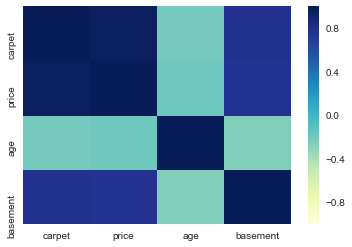

In [49]:
# Example of Seaborn, heatmap
hpdf_num = hpdf[["carpet", "price", "age", "basement"]];
ax = sns.heatmap(hpdf_num.corr(),
                 cmap="YlGnBu")

In [50]:
#Apply
#hpdf_num.apply(np.mean)
hpdf_num.apply(lambda x: x.mean())

carpet      1377.272727
price        265.454545
age           26.636364
basement       0.909091
dtype: float64

In [28]:
hpdf[["carpet", "price"]].apply(my_function)
#Look at apply map and map

carpet    0.529720
price     0.663636
dtype: float64

In [29]:
#the map function: 
ser1 = hpdf["price"]
ser1.map(lambda x: x*0.9)

0     171.0
1     225.0
2     270.0
3     180.0
4     315.0
5     153.0
6     189.0
7     360.0
8     324.0
9     207.0
10    234.0
Name: price, dtype: float64

In [53]:
ser2 = hpdf["type"]
#ser2.map(lambda x: x.upper())
ser2.map(lambda x:x+" OH" if x=="condo" else x+" AHA")

0      condo OH
1     house AHA
2     house AHA
3      condo OH
4     house AHA
5      condo OH
6      condo OH
7     house AHA
8     house AHA
9      condo OH
10    house AHA
Name: type, dtype: object

In [55]:
# Filter a subset: Google it to see more applications
hpdf.filter(items=["price", "carpet"], axis=1)

,price,carpet
0,190,850
1,250,1200
2,300,1500
3,200,900
4,350,2100
5,170,800
6,210,1100
7,400,2600
8,360,1800
9,230,1000


### Time-date Columns
<hr>

In [30]:
!head -n 3 ../../data/aapl_price.csv

﻿Date,Open,High,Low,Close,Volume
29-Dec-17,170.52,170.59,169.22,169.23,25999922
28-Dec-17,171.00,171.85,170.48,171.08,16480187


In [31]:
aapl = pd.read_csv("../../data/aapl_price.csv")
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012 entries, 0 to 2011
Data columns (total 6 columns):
Date      2012 non-null object
Open      2012 non-null float64
High      2012 non-null float64
Low       2012 non-null float64
Close     2012 non-null float64
Volume    2012 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 94.4+ KB


In [32]:
aapl.head(2)

,Date,Open,High,Low,Close,Volume
0,29-Dec-17,170.52,170.59,169.22,169.23,25999922
1,28-Dec-17,171.00,171.85,170.48,171.08,16480187


In [33]:
aapl['Date'] = pd.to_datetime(aapl['Date'])

In [34]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012 entries, 0 to 2011
Data columns (total 6 columns):
Date      2012 non-null datetime64[ns]
Open      2012 non-null float64
High      2012 non-null float64
Low       2012 non-null float64
Close     2012 non-null float64
Volume    2012 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 94.4 KB


In [35]:
# Changing the index
aapl.set_index('Date', drop=True, inplace=True)

In [36]:
print(aapl.info())
aapl.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2012 entries, 2017-12-29 to 2010-01-04
Data columns (total 5 columns):
Open      2012 non-null float64
High      2012 non-null float64
Low       2012 non-null float64
Close     2012 non-null float64
Volume    2012 non-null int64
dtypes: float64(4), int64(1)
memory usage: 94.3 KB
None


,Open,High,Low,Close,Volume
Date,,,,,
2010-01-08,30.04,30.29,29.87,30.28,111969081
2010-01-07,30.25,30.29,29.86,30.08,119282324
2010-01-06,30.63,30.75,30.11,30.14,138039594
2010-01-05,30.66,30.80,30.46,30.63,150476004
2010-01-04,30.49,30.64,30.34,30.57,123432050


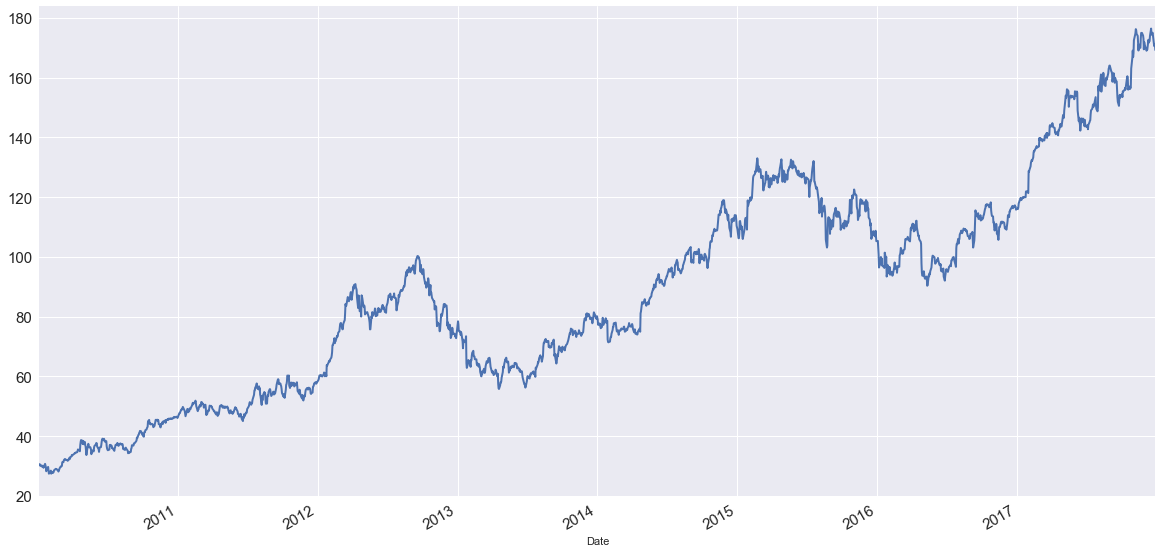

In [37]:
#Plot the closing price
aapl.Close.plot(figsize=(20,10), linewidth=2, fontsize=15)

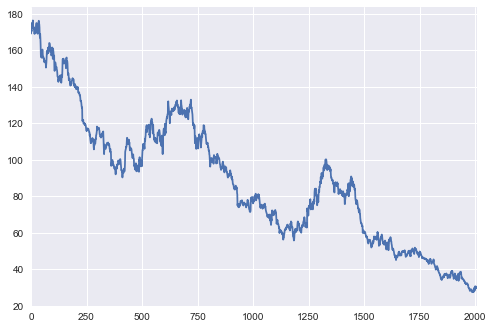

In [64]:
# Disregard it. Look at Seaborn documentation for details
import seaborn as sns
sns.set(style="darkgrid")
sns.tsplot(data=aapl.Close)

In [60]:
# Get Data for Jan 2017
aapl["2017-01"]

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-31,121.15,121.39,120.62,121.35,49200993
2017-01-30,120.93,121.63,120.66,121.63,30377503
2017-01-27,122.14,122.35,121.60,121.95,20562944
2017-01-26,121.67,122.44,121.60,121.94,26337576
2017-01-25,120.42,122.10,120.28,121.88,32586673
2017-01-24,119.55,120.10,119.50,119.97,23211038
2017-01-23,120.00,120.81,119.77,120.08,22050218
2017-01-20,120.45,120.45,119.73,120.00,32597892
2017-01-19,119.40,120.09,119.37,119.78,25597291


In [38]:
# Get Data for some date range
aapl.Close[pd.date_range('2015-01-01', '2015-01-10')]

2015-01-01       NaN
2015-01-02    109.33
2015-01-03       NaN
2015-01-04       NaN
2015-01-05    106.25
2015-01-06    106.26
2015-01-07    107.75
2015-01-08    111.89
2015-01-09    112.01
2015-01-10       NaN
Freq: D, Name: Close, dtype: float64

In [39]:
aapl.Close[pd.date_range('2015-01-01', '2015-01-10')].dropna(how='any')

2015-01-02    109.33
2015-01-05    106.25
2015-01-06    106.26
2015-01-07    107.75
2015-01-08    111.89
2015-01-09    112.01
Name: Close, dtype: float64

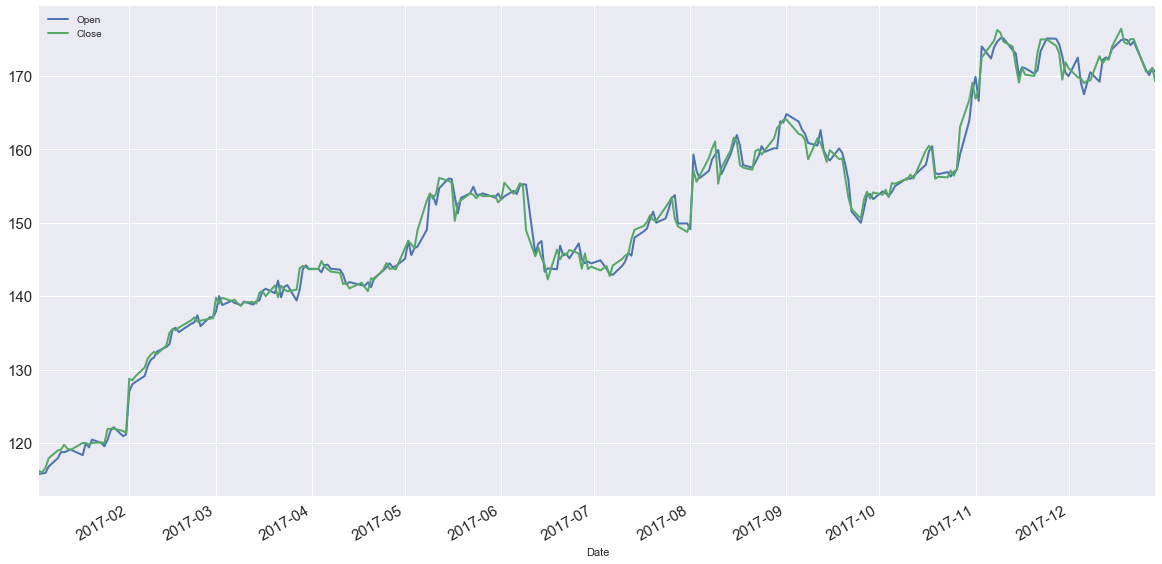

In [40]:
# Plot 2017 data
aapl['2017'][["Open", "Close"]].plot(figsize=(20,10), linewidth=2, fontsize=15)

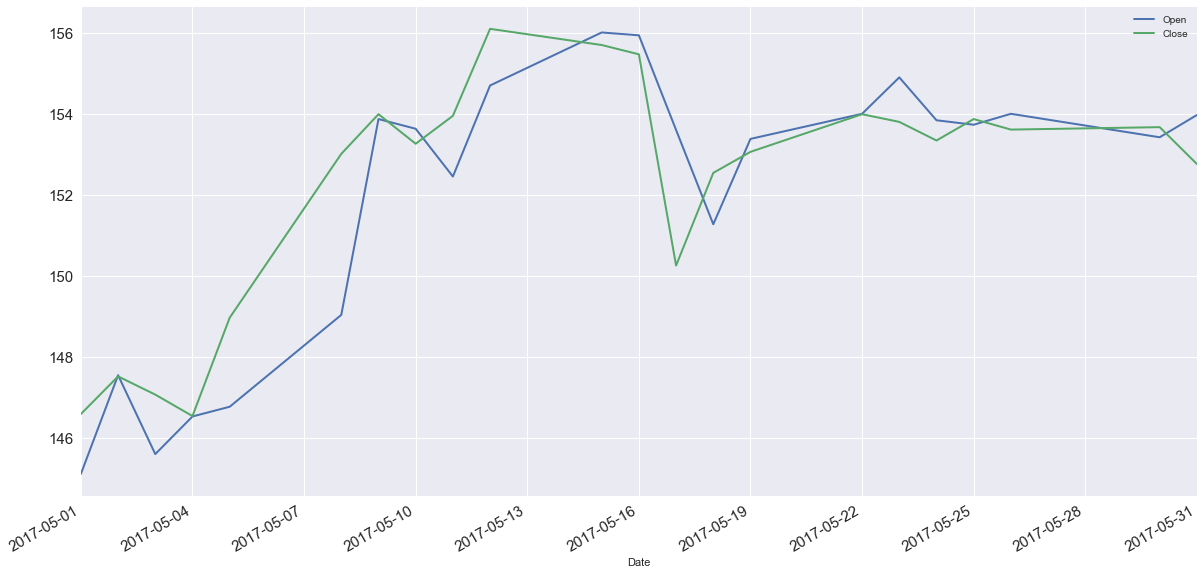

In [71]:
# Plot 2017 data
aapl['2017-05'][["Open", "Close"]].plot(figsize=(20,10), linewidth=2, fontsize=15)

In [41]:
aapl2 = aapl.resample('M')

# For other rules, see: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html

In [73]:
type(aapl2)

pandas.core.resample.DatetimeIndexResampler

In [42]:
#aapl2.Volume.agg(lambda x: x[-1])
# Find the average volume movement per quarter
aapl2.Volume.agg(np.mean)

Date
2010-01-31    1.996023e+08
2010-02-28    1.418064e+08
2010-03-31    1.321284e+08
2010-04-30    1.470518e+08
2010-05-31    2.260516e+08
2010-06-30    1.892436e+08
2010-07-31    1.865605e+08
2010-08-31    1.089762e+08
2010-09-30    1.411070e+08
2010-10-31    1.457881e+08
2010-11-30    1.132166e+08
2010-12-31    7.927453e+07
2011-01-31    1.355383e+08
2011-02-28    1.223144e+08
2011-03-31    1.228585e+08
2011-04-30    1.156845e+08
2011-05-31    8.228629e+07
2011-06-30    1.053010e+08
2011-07-31    1.331820e+08
2011-08-31    1.794247e+08
2011-09-30    1.426115e+08
2011-10-31    1.564575e+08
2011-11-30    1.067504e+08
2011-12-31    7.511156e+07
2012-01-31    8.576619e+07
2012-02-29    1.421343e+08
2012-03-31    1.770963e+08
2012-04-30    1.949882e+08
2012-05-31    1.262140e+08
2012-06-30    9.354376e+07
                  ...     
2015-07-31    4.810367e+07
2015-08-31    7.619132e+07
2015-09-30    5.686873e+07
2015-10-31    4.968845e+07
2015-11-30    3.716572e+07
2015-12-31    4.189102e

In [143]:
aapl.resample('QS').agg({'High':'max',
                         'Low':'min', 'Volume':'mean'}) 
# Try, Q, A etc

,High,Volume,Low
Date,,,
2010-01-01,33.93,1.561593e+08,27.18
2010-04-01,39.86,1.875069e+08,28.46
2010-07-01,42.10,1.449765e+08,33.65
2010-10-01,46.67,1.122365e+08,39.68
2011-01-01,52.13,1.267820e+08,46.41
2011-04-01,50.73,1.009258e+08,44.36
2011-07-01,60.41,1.528945e+08,47.74
2011-10-01,60.96,1.127731e+08,50.61
2012-01-01,88.78,1.363569e+08,58.43


#### Trend by rolling average
*** 
Rolling average smooths noise and seasonality.
Shows long-term behavior over short-term fluctautions after smoothing.
***
Look at the blog for some time series analysis and forecasting: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

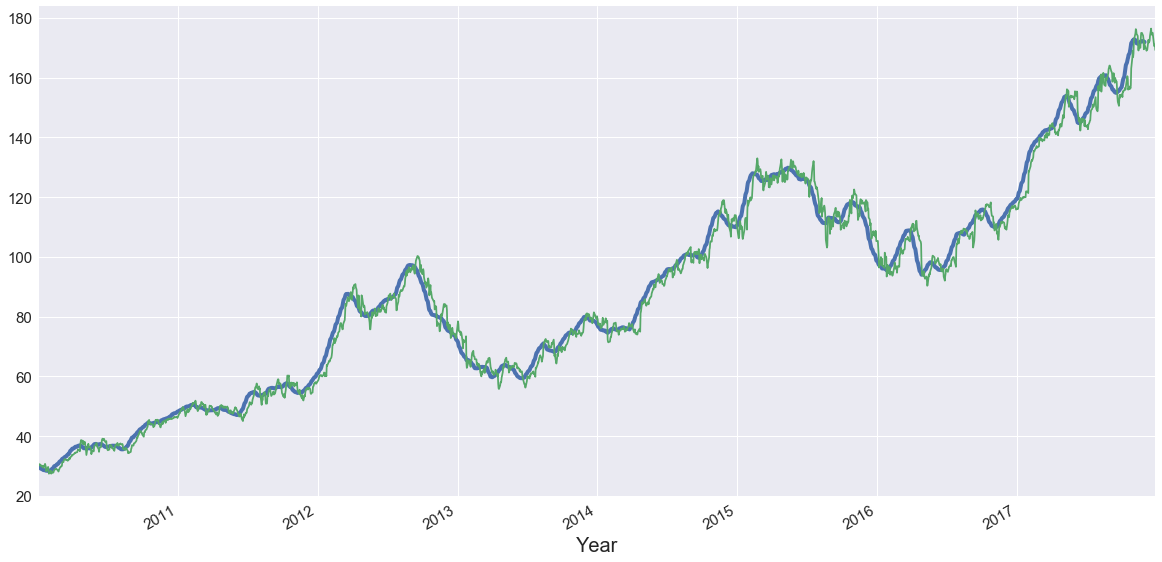

In [91]:
#rolling average
rolling12 = aapl["Close"].rolling(20)
rolling12.mean().plot(figsize=(20,10), linewidth=4, fontsize=15)
aapl["Close"].plot()
plt.xlabel('Year', fontsize=20);

#### Season Patterns in TS by first order differencing.

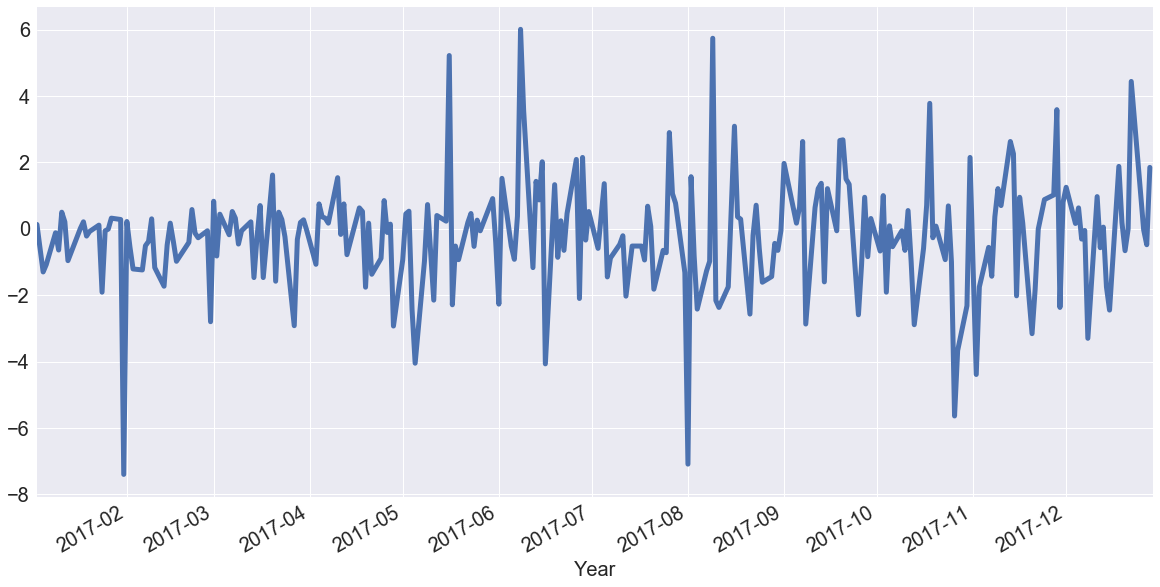

In [106]:
aapl3 = aapl['2017']
aapl3["Close"].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

#### Periodicity and Auto-correlation
***


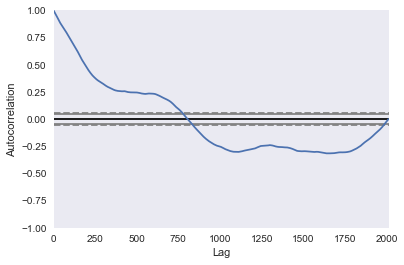

In [107]:
pd.plotting.autocorrelation_plot(aapl["Close"]);

### Classes in Python: an example

In [80]:
# UNDERSTAND THE IMPORTANCE OF STANDARDIZATION and NORMALIZATION
class Standardizer:
    def __init__(self):
        self.mean = 0
        self.std=0
        print "Standardizer object created"
    
    def fit(self, X):        
        # Find the mean of every column
        self.mean = np.mean(X, axis=0)

        # Find the standard deviation of every column/feature
        self.std = np.std(X,axis=0)
    
    def transform(self, X):        
        # Standardize
        return (X - self.mean)/self.std

In [81]:
scaler = Standardizer()

Standardizer object created


In [82]:
X = np.random.rand(10,5)

In [83]:
print X

[[ 0.54  0.28  0.42  0.84  0.  ]
 [ 0.12  0.67  0.83  0.14  0.58]
 [ 0.89  0.21  0.19  0.11  0.22]
 [ 0.98  0.81  0.17  0.82  0.27]
 [ 0.43  0.94  0.82  0.34  0.18]
 [ 0.37  0.01  0.25  0.8   0.02]
 [ 0.6   0.6   0.11  0.38  0.04]
 [ 0.89  0.98  0.06  0.89  0.58]
 [ 0.74  0.63  0.58  0.02  0.21]
 [ 0.54  0.77  0.25  0.29  0.85]]


In [84]:
scaler.fit(X)

In [85]:
Xn = scaler.transform(X)

In [86]:
print Xn

[[-0.27 -1.01  0.21  1.18 -1.07]
 [-1.93  0.26  1.7  -1.    1.04]
 [ 1.1  -1.24 -0.68 -1.09 -0.28]
 [ 1.44  0.72 -0.73  1.1  -0.07]
 [-0.71  1.14  1.67 -0.39 -0.44]
 [-0.94 -1.9  -0.43  1.03 -1.03]
 [-0.05  0.04 -0.98 -0.25 -0.96]
 [ 1.1   1.27 -1.14  1.33  1.05]
 [ 0.51  0.13  0.8  -1.36 -0.31]
 [-0.26  0.58 -0.43 -0.54  2.07]]


In [87]:
print np.sum(Xn, axis=0)
print np.std(Xn, axis=0)

[  1.89e-15  -2.22e-15   2.94e-15  -2.44e-15   8.88e-16]
[ 1.  1.  1.  1.  1.]


In [207]:
# Verify that the data hs been changed 
## to have zero mean along any column

np.sum(Xn, axis=0)

array([  0.00000000e+00,   8.88178420e-16,  -1.66533454e-15,
         1.66533454e-15,   1.77635684e-15])

In [208]:
## and standard deviation 1
np.std(Xn, axis=0)

array([ 1.,  1.,  1.,  1.,  1.])

## UCI Income-census dataset exploration
***
Data Source: https://archive.ics.uci.edu/ml/datasets/adult
<br>
**DO the following**
-  Load Data
-  Inspect data
-  Get basic information
-  Missing Entries
-  Outliers
-  Visualization
-  Correlation

In [124]:
url3 = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

col_names = ["age", "workclass", "fnlwgt", "education", 
              "educationnum", "maritalstatus", "occupation",
              "relationship", "race", "sex", "capitalgain",
              "capitalloss", "hoursperweek", "nativecountry",
              "incomelevel"]


In [142]:
df = pd.read_csv(url3, names=col_names, skipinitialspace=True)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age              32561 non-null int64
workclass        32561 non-null object
fnlwgt           32561 non-null int64
education        32561 non-null object
educationnum     32561 non-null int64
maritalstatus    32561 non-null object
occupation       32561 non-null object
relationship     32561 non-null object
race             32561 non-null object
sex              32561 non-null object
capitalgain      32561 non-null int64
capitalloss      32561 non-null int64
hoursperweek     32561 non-null int64
nativecountry    32561 non-null object
incomelevel      32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [127]:
df.head(2)

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,incomelevel
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [128]:
df.describe()

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [130]:
df.dtypes==object

age              False
workclass         True
fnlwgt           False
education         True
educationnum     False
maritalstatus     True
occupation        True
relationship      True
race              True
sex               True
capitalgain      False
capitalloss      False
hoursperweek     False
nativecountry     True
incomelevel       True
dtype: bool

In [133]:
# Look at the unique values of every categorical column
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'], dtype=object)

In [132]:
df.workclass = df.workclass.str.strip()

In [137]:
df.maritalstatus.unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed'], dtype=object)

In [145]:
df.replace('?',np.nan, inplace=True)

In [146]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'], dtype=object)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age              32561 non-null int64
workclass        30725 non-null object
fnlwgt           32561 non-null int64
education        32561 non-null object
educationnum     32561 non-null int64
maritalstatus    32561 non-null object
occupation       30718 non-null object
relationship     32561 non-null object
race             32561 non-null object
sex              32561 non-null object
capitalgain      32561 non-null int64
capitalloss      32561 non-null int64
hoursperweek     32561 non-null int64
nativecountry    31978 non-null object
incomelevel      32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [150]:
#Drop row with missing entries
df.dropna(how='any', inplace=True)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
age              30162 non-null int64
workclass        30162 non-null object
fnlwgt           30162 non-null int64
education        30162 non-null object
educationnum     30162 non-null int64
maritalstatus    30162 non-null object
occupation       30162 non-null object
relationship     30162 non-null object
race             30162 non-null object
sex              30162 non-null object
capitalgain      30162 non-null int64
capitalloss      30162 non-null int64
hoursperweek     30162 non-null int64
nativecountry    30162 non-null object
incomelevel      30162 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [152]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

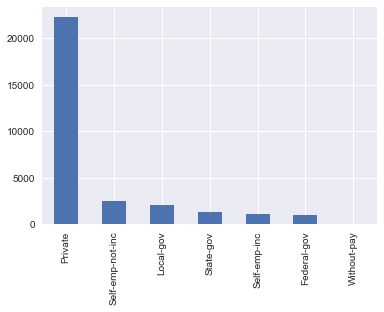

In [155]:
df.workclass.value_counts().plot(kind='bar')

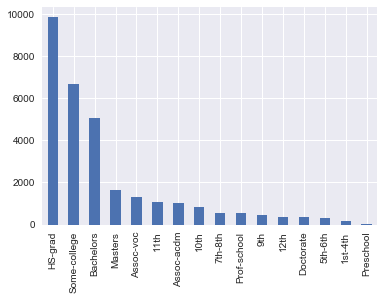

In [157]:
df.education.value_counts().plot.bar()

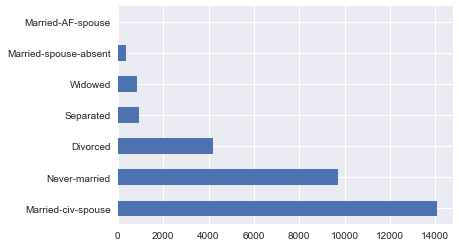

In [161]:
df.maritalstatus.value_counts().plot(kind='barh')